In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import torch

%matplotlib inline

In [2]:
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'

#Do not forget to run pip install facenet-pytorch
from facenet_pytorch import MTCNN
mtcnn = MTCNN(keep_all=False, post_process=False, min_face_size=40, device=device)

def detect_face(frame):
    bounding_boxes, probs = mtcnn.detect(frame, landmarks=False)
    bounding_boxes=bounding_boxes[probs>0.9]
    return bounding_boxes

print(use_cuda)

True


In [3]:
from hsemotion.facial_emotions import HSEmotionRecognizer
model_name='enet_b0_8_best_afew'
#model_name='enet_b0_8_best_vgaf'
#model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

C:\Users\avsavchenko\.hsemotion\enet_b0_8_best_afew.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


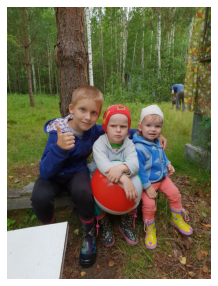

In [4]:
fpath='20180720_174416.jpg'
frame_bgr = cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)

bounding_boxes=detect_face(frame)

Happiness [-2.479621    2.2817333  -0.68236405 -1.5044528   2.786398    0.3610033
 -1.203296   -0.28963578]
Anger [ 5.470927    0.02302544  1.9132878   1.6802043  -2.815168    1.1558341
  2.20422    -1.3341352 ]
Fear [-2.6938741  -0.9670596  -0.03839226  2.170745    2.066957    0.03462309
 -0.0464303   1.8436623 ]


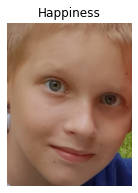

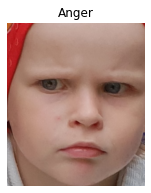

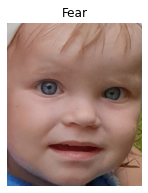

In [5]:
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    emotion,scores=fer.predict_emotions(face_img,logits=True)
    print(emotion,scores)
    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

In [6]:
features=fer.extract_features(face_img)
print(features.shape,features)

(1, 1280) [[-0.02051418  0.05693425 -0.13048033 ... -0.15725467  0.07156633
  -0.14101806]]


['Happiness', 'Anger', 'Fear'] [[2.8581440e-03 3.3412904e-01 1.7243408e-02 7.5786961e-03 5.5346102e-01
  4.8949882e-02 1.0242015e-02 2.5537755e-02]
 [9.0232509e-01 3.8848084e-03 2.5721747e-02 2.0373875e-02 2.2738316e-04
  1.2059863e-02 3.4407314e-02 9.9991355e-04]
 [2.5627413e-03 1.4409560e-02 3.6472529e-02 3.3218625e-01 2.9943860e-01
  3.9235219e-02 3.6180545e-02 2.3951453e-01]]


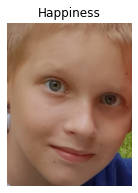

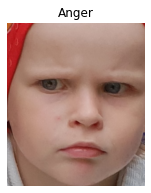

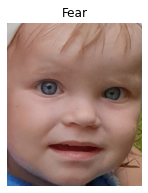

In [7]:
face_img_list=[]
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    face_img_list.append(face_img)

emotions,scores=fer.predict_multi_emotions(face_img_list,logits=False)
print(emotions,scores)

for face_img,emotion in zip(face_img_list,emotions):    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

In [8]:
features=fer.extract_multi_features(face_img_list)
print(features.shape,features)

(3, 1280) [[-0.19220257  0.02514308 -0.09053314 ... -0.07387376  0.17337616
   0.07425296]
 [ 0.08527321 -0.0995563  -0.05925399 ...  0.05283366 -0.19729096
   0.00884614]
 [-0.02051418  0.05693425 -0.13048033 ... -0.15725467  0.07156633
  -0.14101806]]
